In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Main idea
Solve $A\vec{x} = \vec{b}$.

In  [steepest descent](Notes_Steepest_Descent.ipynb) negative gradient (= residual) is orthogonal to error (direction to solution). 

Probably due to quadratic objective function. But this direction is not facing solution, and trajectory zigzags  for many steps until result converges.

__(IMPORTANT!)__

If our quadratic form was sphere shaped (only equal, non-zero quadratic coefficients), any tangent plane to function iso-surface would point exactly to the center!

In fact, vectors forming plane would be orthogonal to normal vector, and latter would be the direction of shortest path to sphere center (solution).

__The IDEA__ of conjugate directions $\vec{d}$ method, is to exploit this orthogonality, by redefining it to non spherical optimization functional. 
$$\vec{d}_i^TA \vec{d}_j= 0 \ ; \ i \neq j$$

One can view this procedure as gradient descent in 'stretched' parameter space. $A$ holds parameters which define shape of paraboloid.

Additional benefit of this approach is that each displacement extends search space (line-> plane-> ...) and next direction, in extended space, is conducted in orthogonal direction to previous space (plane tangent to a sphere).

This allows to do a search in independent directions. For $\vec{x} \in \R^n$ there are just $n$ such directions, which implies convergence in $n$ steps. 

## Few definitions
Original problem 

$$\boxed{A\vec{x} = \vec{b}}$$

from [steepest descent](Notes_Steepest_Descent.ipynb) we know that

$$\vec{r} = \vec{b} - A \vec{x}$$
and use it to replace a gradient
$$\nabla_{\vec{x}} \ f(\vec{x}) = - \vec{r}$$
where $f$ is quadratic form of OG problem.
$$f(\vec{x}) = \frac{1}{2} \vec{x}^T A \vec{x} - \vec{b}^T\vec{x}$$

This allowed us to form gradient descent expression as
$$\vec{x}_{i+1} = \vec{x}_i + \alpha_i \vec{r}_i$$

error term - a hypotetical distance vector from true solution $\vec{x}$ to current guess $\vec{x}_i$
$$\boxed{\vec{e}_i = \vec{x}_i - \vec{x}}$$
$$A \vec{e}_i = A \vec{x}_i - A \vec{x}
= A \vec{x}_i - \vec{b} = - \vec{r}_i $$

error is related to residual via matrix $A$
$$\boxed{\vec{r}_i = - A \vec{e}_i }$$

using definition of error, we can alternatively define gradient descent step
$$\boxed{\vec{e}_{i+1} = \vec{e}_i + \alpha_i \vec{r}_i}$$

## Method Orthogonal Directions
Suppose we drop the idea of stepping 'against the gradient' and move only in one degree of freedom at a time.

That depends on dimensions of $\vec{x} \in \R^n$. 

Orthogonal search dimensions: $\{\vec{d}_0,\cdots, \vec{d}_{n-1}\}$. We will converge onto true $\vec{x}$ in $n$ steps.

Each step we 'resolve' each search dimension, so error term (vector that points form solution to current guess) is orthogonal to previous search dimension(s):

$$\vec{d}_i^T \vec{e}_{i+1} = 0\\
\vec{d}_i^T (\vec{e}_i + \alpha_i \vec{d}_i) = 0$$

$$\alpha_i = -\frac{\vec{d}_i^T\vec{e}_i }{\vec{d}_i^T\vec{d}_i}$$

Although idea of using error is absurd, since we have to know solution to use it.

Instead we use A-orthogonality, which helps us eliminate (as we will see) error term
$$\boxed{\vec{d}_i^TA \vec{d}_j= 0}$$
$$\vec{d}_i^T A \vec{e}_{i+1} = 0\\
\vec{d}_i^T A (\vec{e}_i + \alpha_i \vec{d}_i) = 0$$

$$\alpha_i = -\frac{\vec{d}_i^T A \vec{e}_i }{\vec{d}_i^T A \vec{d}_i}$$
using error-residual relation $\vec{r}_i = - A \vec{e}_i $
$$\boxed{\alpha_i = \frac{\vec{d}_i^T \vec{r}_i }{\vec{d}_i^T A \vec{d}_i}}$$
This contains only quantities we can calculate.

$$\boxed{\vec{x}_{i+1} = \vec{x}_i + \alpha_i \vec{d}_i}$$

_Note: if we were to select steps against the gradient ($\vec{d}_i = \vec{r}$), we retrieve expression for step size of steepest descent method_
$$\alpha^* = \frac{\vec{r}^T\vec{r}}{ \vec{r}^TA\vec{r}}$$
## Orthogonality
if 
$$\vec{x}_{i+1} = \vec{x}_i + \alpha_i \vec{d}_i$$
then 
$$\vec{x}_{2} = \vec{x}_{1} + \alpha_{1} \vec{d}_{1} = \vec{x}_0 + \alpha_0 \vec{d}_0 + \alpha_{1} \vec{d}_{1}$$
$$\vec{x}_{k} = \vec{x}_0 + \sum_{j = 0}^{k-1} \alpha_k \vec{d}_k$$

or via error
$$\boxed{\vec{e}_{k} = \vec{e}_0 + \sum_{j = 0}^{k-1} \alpha_k \vec{d}_k}$$
if we express initial error as a combination of search directions:
$$\vec{e}_{0} = \sum_{j = 0}^{n-1} \delta_j \vec{d}_j$$

_TBH IM so TILTED BY THIS ALGEBRA GYMNASTICS_

$$(\vec{d}_k^T A) \vec{e}_0 = (\vec{d}_k^T A ) \sum_{j = 0}^{n-1} \delta_j \vec{d}_j = \sum_{j = 0}^{n-1} \delta_j \vec{d}_k^T A  \vec{d}_j = \delta_k \vec{d}_k^T A  \vec{d}_k$$
$$\delta_k = \frac{\vec{d}_k^T A  \vec{e}_0}{\vec{d}_k^T A  \vec{d}_k}$$
because 
$$\vec{d}_k^T A \vec{d}_i = 0 \ ; \ k \neq i$$

$$\delta_k = \frac{\vec{d}_k^T A  \vec{e}_k}{\vec{d}_k^T A  \vec{d}_k} = -\alpha_i$$

$$\vec{e}_j  = \underbrace{\vec{e}_0}_{ \sum_{j = 0}^{n-1} \delta_j \vec{d}_j} + \sum_{j = 0}^{i-1} \underbrace{\alpha_j}_{-\delta_j} \vec{d}_j$$
$$ = \sum_{j = 0}^{n-1} \delta_j \vec{d}_j - \sum_{j = 0}^{i-1} \delta_j \vec{d}_j$$
$$ \boxed{\vec{e}_j =  \sum_{j = i}^{n-1} \delta_j \vec{d}_j}$$

each iteration, up to $n$ (degrees of freedom, dim of $\vec{x}$), error looses component $\vec{d}_j$

$$(-\vec{d}_i^T A) \vec{e}_j = (-\vec{d}_i^T A) \sum_{j = i}^{n-1} \delta_j \vec{d}_j$$
$$ = -  \sum_{j = i}^{n-1} \delta_j \vec{d}_i^T A\vec{d}_j$$

$$\vec{r}_j = - A \vec{e}_j$$
$$(-\vec{d}_i^T A) \vec{e}_j = \vec{d}_i^T\vec{r}_j = \sum_{j = i}^{n-1} \delta_j \vec{d}_i^T A\vec{d}_j = 0 \ ; \ i \gt j$$

$$\boxed{\vec{d}_i^T\vec{r}_j  = 0 \ ; \ i \gt j}$$
implies that residual is orthogonal to expanded space (hyperplane)

_im so tired of these bs proofs..._

How to select A-orthogonal search dimensions?

## Conjugate Gram-Schmidt (GS) process
### Ordinary GS
Original GS process is very simple. 
1. Start with initial vector $\vec{v}_1$,
2. Select next vector $\vec{v}_2$, decompose it into a part that <br>
projects onto $\vec{v}_1$: $proj_{\vec{v}_1 } (\vec{v}_2)$ and remaining part $\vec{v}_2 - proj_{\vec{v}_1 } (\vec{v}_2)$; 
3. modify this vector: $\vec{u}_2 = \vec{v}_2 -proj_{\vec{v}_1 } (\vec{v}_2)$  remove part that projects onto 1. $\leftrightarrow$ orthogonality
4. select next vector. repeat 2,3 considering all previous vectors
5. repeat 2 - 5

for example if $\{\vec{v}_1, \vec{v}_2,\dots,\vec{v}_k\}$ are linearly independent, but not orthogonal and we want to orthogonalize them to $\vec{u}_i$:
1. $$\vec{u}_1 = \vec{v}_1$$
2. $$\vec{u}_2 = \vec{v}_2 - proj_{\vec{u}_1 } (\vec{v}_2)$$
3. $$\vec{u}_3 = \vec{v}_3 - proj_{\vec{u}_1 } (\vec{v}_3) - proj_{\vec{u}_2 } (\vec{v}_3)$$
4. $$\dots$$
5. $$\vec{u}_k = \vec{v}_k - \sum_{j=1}^{k-1} proj_{\vec{u}_j }(\vec{v}_k)$$
where 
$$ proj_{\vec{u} }(\vec{v}) = (\vec{v} \cdot \hat{\vec{u}})\hat{\vec{u}} $$
where $\hat{\vec{u}}$ is unit length vector in $\vec{u}$ direction, so
$$proj_{\vec{u} }(\vec{v}) = \bigg(\vec{v} \cdot \frac{\vec{u}}{|\vec{u}|} \bigg)  \frac{\vec{u}}{|\vec{u}|} = \frac{\vec{v}  \cdot \vec{u}}{|\vec{u}|^2}\vec{u} = \frac{\vec{v}  \cdot \vec{u}}{\vec{u}  \cdot \vec{u}}\vec{u}$$

### Conjugate GS
We modify this definition to include A-orthogonality
$$\vec{d}_i = \vec{u}_i -  \sum_{k=0}^{i-1} \beta_{ik} \vec{d}_k$$
$$\beta_{ik} = \frac{\vec{u}_i^T  A \vec{d}_k}{\vec{d}^T_k A \vec{d}_k}$$

Write a A-orthogonalization algorithm

In [8]:
A = np.array([[3,2],[2,6]])
b = np.array([[2,-8]]).T

def GS_A(x,A):
    ds = []
    Ads = []
    dAds = []
    for u in x.T:
        d = u.copy()
        for d_old, Ad, dTAd in zip(ds,Ads,dAds):
            d -= (u @ Ad / dTAd) * d_old
        ds.append(d)
        Ad = A @ d
        Ads.append(Ad)
        dAds.append(u @ Ad)

    return ds

A = np.eye(2)
u = np.array([[1,1],[1,0]], dtype = float).T
v1,v2 = GS_A(u,A)
print(v1,v2)
print(v1 @ A @ v2, v1 @ A @ v1)

[1. 1.] [ 0.5 -0.5]
0.0 2.0


Explore steps in all individual dimensions.  GS is integrated inside each step

In [61]:
A = np.array([[3,2],[2,6]])
b = np.array([2,-8])

us = np.array([[0,1],[1,1]], dtype = float)

xi = np.array([-2,2])

xs = [xi]
res = [np.linalg.norm(b - A @ xi)]
ds = []
Ads = []
dAds = []
for i,u in enumerate(us):
    # gram schmidt part
    d = u.copy()
    for d_old, Ad, dTAd in zip(ds,Ads,dAds):
        d -= (u @ Ad / dTAd) * d_old
    ds.append(d)
    Ad = A @ d
    Ads.append(Ad)
    dAds.append(u @ Ad)
    # stepping part
    r = b - A @ xi
    alpha = np.dot(d,r)/(d @ A @ d)
    xi = xi + alpha*d
    xs.append(xi.copy())
    res.append(np.linalg.norm(b - A @ xi))

print(res)
print(xs)


[16.492422502470642, 9.333333333333332, 2.220446049250313e-15]
[array([-2,  2]), array([-2.        , -0.66666667]), array([ 2., -2.])]


Plot results

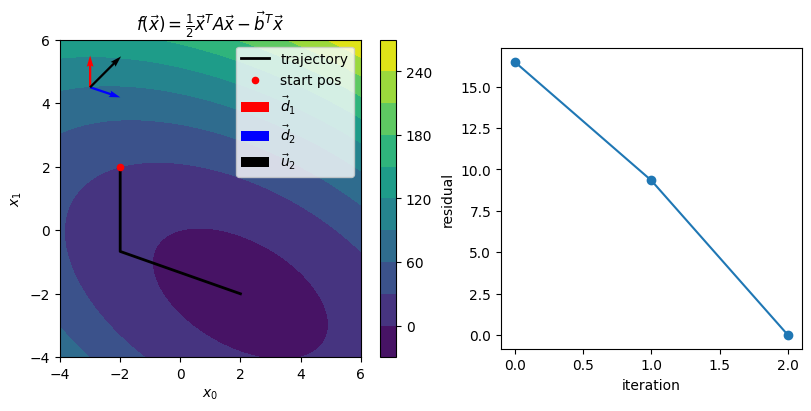

In [66]:
T = lambda x: np.moveaxis(x, -1, -2) 
b2 = b.reshape(-1,1)

def f(x):
    return (0.5*T(x) @ A @ x - T(b2) @ x)

N_samples = 200
dom = (-4,6)
dom1 = np.linspace(*dom, N_samples)
X,Y = XY = np.meshgrid(dom1,dom1)
domain_xy = np.stack(XY, axis = -1)[...,None]
obj_fn = f(domain_xy).reshape(N_samples,N_samples)
fig, axs = plt.subplots(1,2, figsize = (2*4, 4), layout='constrained')

c = axs[0].contourf(X,Y, obj_fn, extent = [*dom*2],levels = 10)
plt.gca().set_aspect(1)
plt.colorbar(c)

axs[0].plot(*np.array(xs).T.reshape(2,-1), color = 'k', lw = 2, label = 'trajectory')
axs[0].scatter(*xs[0], c = 'r', s = 20, zorder = 2, label = 'start pos')
axs[0].quiver(-3,4.5,*ds[0],scale_units='xy', units='xy', scale = 1, color = 'r', label = r'$\vec{d}_1$')
axs[0].quiver(-3,4.5,*ds[1],scale_units='xy', units='xy', scale = 1, color = 'b', label = r'$\vec{d}_2$')
axs[0].quiver(-3,4.5,*us.T[1],scale_units='xy', units='xy', scale = 1, color = 'k', label = r'$\vec{u}_2$')
axs[0].set_xlabel(r'$x_0$')
axs[0].set_ylabel(r'$x_1$')
axs[0].set_title(r'$f(\vec{x}) = \frac{1}{2} \vec{x}^T A \vec{x} - \vec{b}^T\vec{x}$')
axs[0].legend();

axs[1].plot(res)
axs[1].scatter(range(len(res)),res)
axs[1].set_xlabel('iteration')
axs[1].set_ylabel('residual')
axs[1].set_aspect(2/max(res))